In [1]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2TkAgg
from matplotlib import colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
import numpy as np
np.set_printoptions(threshold='nan')
import pandas as pd
import seaborn as sns
import sys
if sys.version_info[0] < 3:
    import Tkinter as Tk
else:
    import tkinter as Tk
    
#from tkFileDialog import askopenfilename,askdirectory,asksaveasfile
sys.path.append('python')
import clusterOutliers
import keplerml
%matplotlib notebook

def tabby(df):
    return df[df.index.str.contains('8462852')]

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [107]:
def out_samp(df,inds):

    return df[df.index.str.contains('|'.join(inds))]

In [51]:
# the FullSample is all common points between Quarters 4, 8, 11, and 16. These files are set up as pandas dataframes
# and contain calculated features and previously computed cluster identifications.

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q4_FullSample.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q4 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
Q4.dataSample = Q4.data
Q4.filesSample =Q4.dataSample.index
Q4.sampleGenerated = True
Q4.sampleTSNE = True

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q8_FullSample.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q8fitsfiles" # path to fits files
Q8 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
# This is only a sampling of the data, so the dataSample is, by definition, the data
Q8.dataSample=Q8.data
Q8.filesSample=Q8.dataSample.index
# Specify that the sample is a good one
Q8.sampleGenerated = True
# Specifying that the sample has a TSNE reduction
Q8.sampleTSNE = True

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q11_FullSample.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q11fitsfiles" # path to fits files
Q11 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
Q11.dataSample = Q11.data
Q11.filesSample =Q11.dataSample.index
Q11.sampleGenerated = True
Q11.sampleTSNE = True

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q16_FullSample.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q16fitsfiles" # path to fits files
Q16 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
Q16.dataSample = Q16.data
Q16.filesSample =Q16.dataSample.index
Q16.sampleGenerated = True
Q16.sampleTSNE = True

#Q_dict = {'Q4':Q4,'Q8':Q8,'Q11':Q11,'Q16':Q16}

In [3]:
featCSV = "/home/dgiles/Documents/KeplerLCs/output/paper_sample_4" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q4_sample = clusterOutliers.clusterOutliers(featCSV,fitsDir)

featCSV = "/home/dgiles/Documents/KeplerLCs/output/paper_sample_8" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q8_sample = clusterOutliers.clusterOutliers(featCSV,fitsDir)

featCSV = "/home/dgiles/Documents/KeplerLCs/output/paper_sample_11" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q11_sample = clusterOutliers.clusterOutliers(featCSV,fitsDir)

featCSV = "/home/dgiles/Documents/KeplerLCs/output/paper_sample_16" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q16_sample = clusterOutliers.clusterOutliers(featCSV,fitsDir)

Q_dict = {'Q4':Q4_sample,'Q8':Q8_sample,'Q11':Q11_sample,'Q16':Q16_sample}

In [42]:
def annotatePt(x,y,label,ax):
    """
    Annotate an axis with a label that has a small rounded box
    Args:
        X (np.array) - array of points, of shape (numPoints, 3)
        index (int) - index (into points array X) of item which should be printed
    Returns:
        None
    """

    x_ax = ax.get_xlim()[1]-ax.get_xlim()[0] # width of axes
    y_ax = ax.get_ylim()[1]-ax.get_ylim()[0] # height of axes
    
    xt=x+.05*x_ax
    yt=y+.05*y_ax
    # Get data point from array of points X, at position index
    bbox_props = dict(boxstyle="round,pad=0.3",fc='w',ec='0.5',alpha=.8)
    t = ax.text(xt,yt, label, ha="center", va="center",
                size=10,
                bbox=bbox_props)
    ax.scatter(x,y,marker='o',s=50,c='orange')

In [4]:
%matplotlib inline

def four_panel_tsne(data):
    labels = data.db_out
    outliers = data[labels==-1]
    core = data[labels==0]
    edge = data[labels==1]
    
    cNorm  = colors.Normalize(vmin=min(labels), vmax=max(labels))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='viridis')
    colorVal = scalarMap.to_rgba(labels)

    fig = plt.figure(figsize=(15,30))
    ax1 = fig.add_subplot(422)

    ax1.scatter(outliers[outliers.tsne_x<40].tsne_x,
                outliers[outliers.tsne_x<40].tsne_y,
                c=colorVal[labels==-1][outliers.tsne_x<40],
                marker='.',alpha=.2)
    ax1.set_title('Outliers')

    ax2 = fig.add_subplot(421)
    ax2.scatter(core.tsne_x,
                core.tsne_y,
                c=colorVal[labels==0],
                marker='.',alpha=.2)
    ax2.set_title('Cluster Core Members')

    ax3 = fig.add_subplot(423)
    ax3.scatter(edge.tsne_x,
                edge.tsne_y,
                c=colorVal[labels==1],
                marker='.',alpha=.2)
    ax3.set_title('Cluster Edge Members')
    
    ax4 = fig.add_subplot(424)
    ax4.scatter(data[data.tsne_x<40].tsne_x,
                data[data.tsne_x<40].tsne_y,
                c=colorVal[data.tsne_x<40],
                marker='.',alpha=.2)
    ax4.set_title('All data')
    
    ax1.set_xlim(ax4.get_xlim())
    ax1.set_ylim(ax4.get_ylim())
    ax2.set_xlim(ax4.get_xlim())
    ax2.set_ylim(ax4.get_ylim())
    ax3.set_xlim(ax4.get_xlim())
    ax3.set_ylim(ax4.get_ylim())

    return

In [5]:
%matplotlib inline

from matplotlib import colors
import matplotlib.cm as cmx

def four_panel_pca(data):
    labels = data.db_out
    outliers = data[labels==-1]
    core = data[labels==0]
    edge = data[labels==1]
    
    cNorm  = colors.Normalize(vmin=min(labels), vmax=max(labels))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='viridis')
    colorVal = scalarMap.to_rgba(labels)

    fig = plt.figure(figsize=(15,30))
    ax1 = fig.add_subplot(422)

    ax1.scatter(outliers.pca_x,
                outliers.pca_y,
                c=colorVal[labels==-1],
                marker='.',alpha=.2)
    ax1.set_title('Outliers')

    ax2 = fig.add_subplot(421)
    ax2.scatter(core.pca_x,
                core.pca_y,
                c=colorVal[labels==0],
                marker='.',alpha=.2)
    ax2.set_title('Cluster Core Members')

    ax3 = fig.add_subplot(423)
    ax3.scatter(edge.pca_x,
                edge.pca_y,
                c=colorVal[labels==1],
                marker='.',alpha=.2)
    ax3.set_title('Cluster Edge Members')
    
    ax4 = fig.add_subplot(424)
    ax4.scatter(data[data.tsne_x<40].tsne_x,
                data[data.tsne_x<40].tsne_y,
                c=colorVal[data.tsne_x<40],
                marker='.',alpha=.2)
    ax4.set_title('All data')
    
    ax1.set_xlim(ax4.get_xlim())
    ax1.set_ylim(ax4.get_ylim())
    ax2.set_xlim(ax4.get_xlim())
    ax2.set_ylim(ax4.get_ylim())
    ax3.set_xlim(ax4.get_xlim())
    ax3.set_ylim(ax4.get_ylim())

    return

In [111]:
def tsne_scatter(data,hl='tabby',ax=False):
    if not ax:
        ax = plt.subplot()
    labels = data.db_out
    outliers = data[labels==-1]
    core = data[labels==0]
    edge = data[labels==1]
    
    cNorm  = colors.Normalize(vmin=min(labels), vmax=max(labels))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='viridis')
    colorVal = scalarMap.to_rgba(labels)

    ax.scatter(data[data.tsne_x<40].tsne_x,
                data[data.tsne_x<40].tsne_y,
                c=colorVal[data.tsne_x<40],
                marker='.',alpha=.2)
    if type(hl)==str:
        if hl=='tabby':
            hl_data = tabby(data)
    else:
        hl_data = hl
    for i in hl_data.index:
        annotatePt(hl_data.loc[i].tsne_x,hl_data.loc[i].tsne_y,i[:13],ax)
    #ax.scatter(hl_data.tsne_x,hl_data.tsne_y,c='red',marker='o',s=50)
    
    return ax

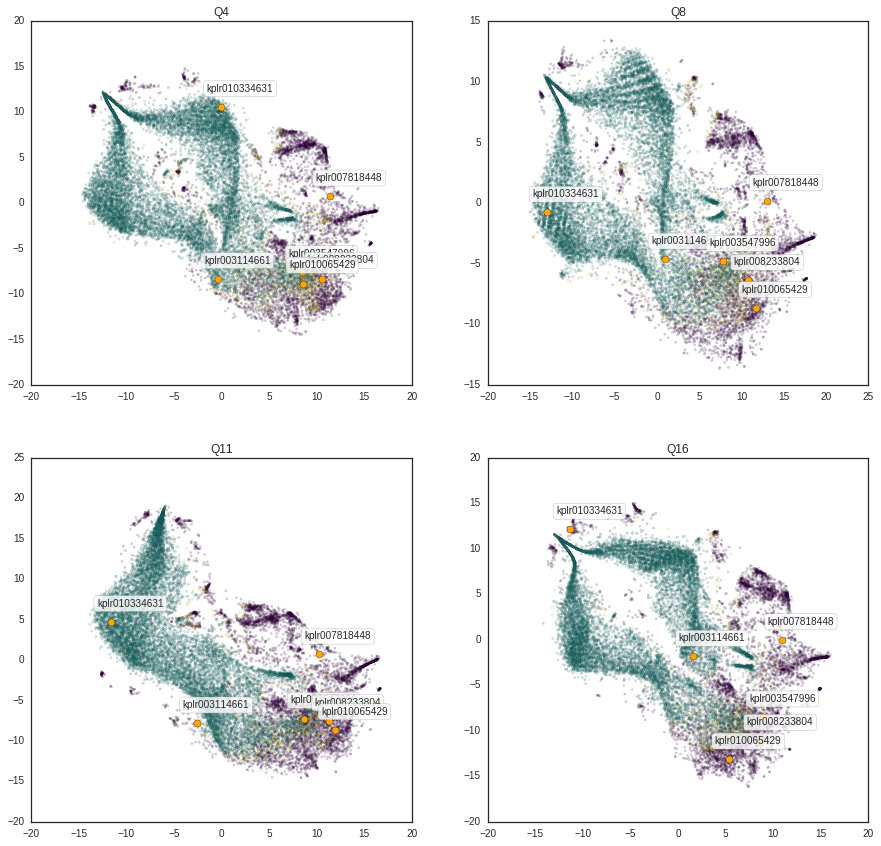

In [114]:
fig = plt.figure(figsize=(15,30))
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)

tsne_scatter(Q4_sample.data,hl=out_samp(Q4_sample.data,out_samp_inds),ax=ax1)
ax1.set_title('Q4')
tsne_scatter(Q8_sample.data,hl=out_samp(Q8_sample.data,out_samp_inds),ax=ax2)
ax2.set_title('Q8')
tsne_scatter(Q11_sample.data,hl=out_samp(Q11_sample.data,out_samp_inds),ax=ax3)
ax3.set_title('Q11')
tsne_scatter(Q16_sample.data,hl=out_samp(Q16_sample.data,out_samp_inds),ax=ax4)
ax4.set_title('Q16')

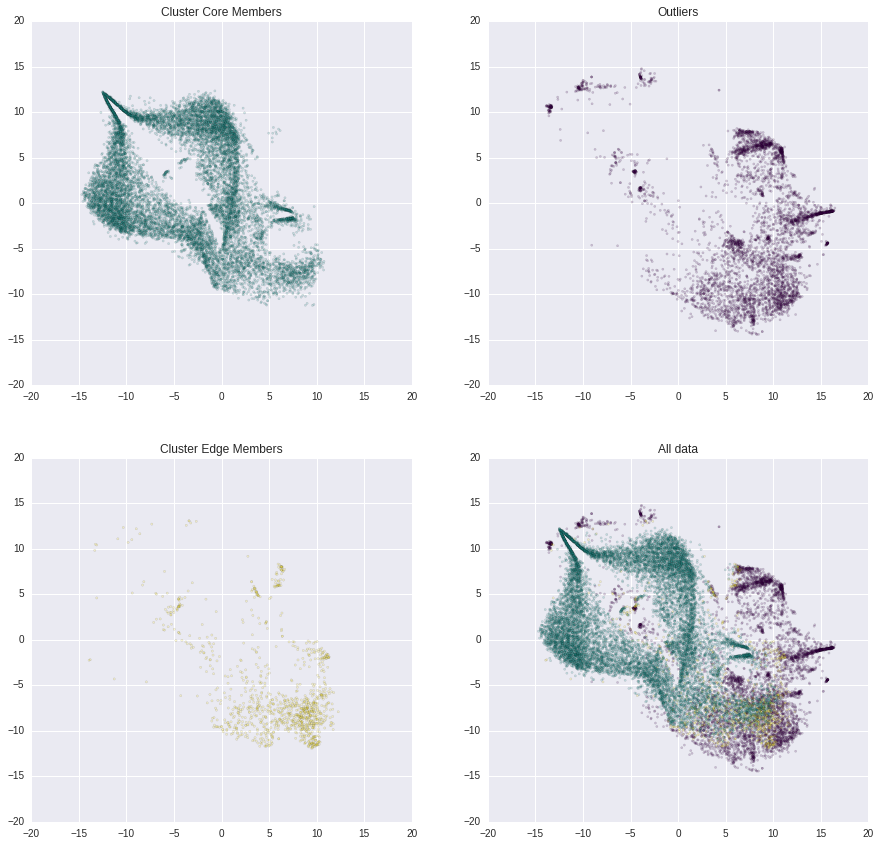

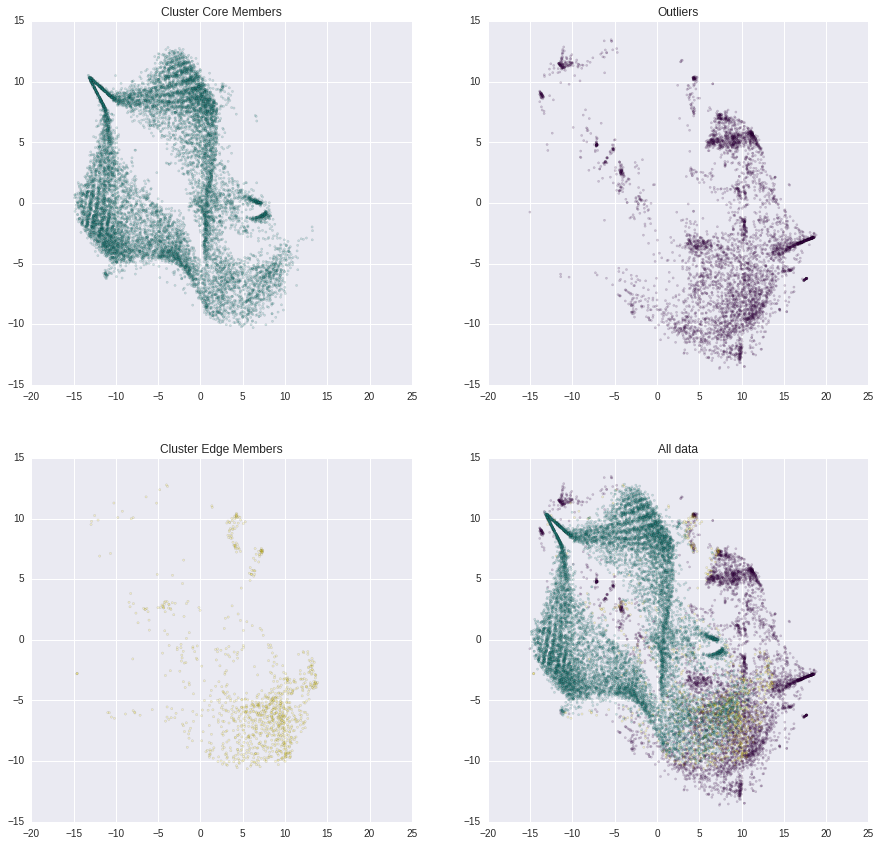

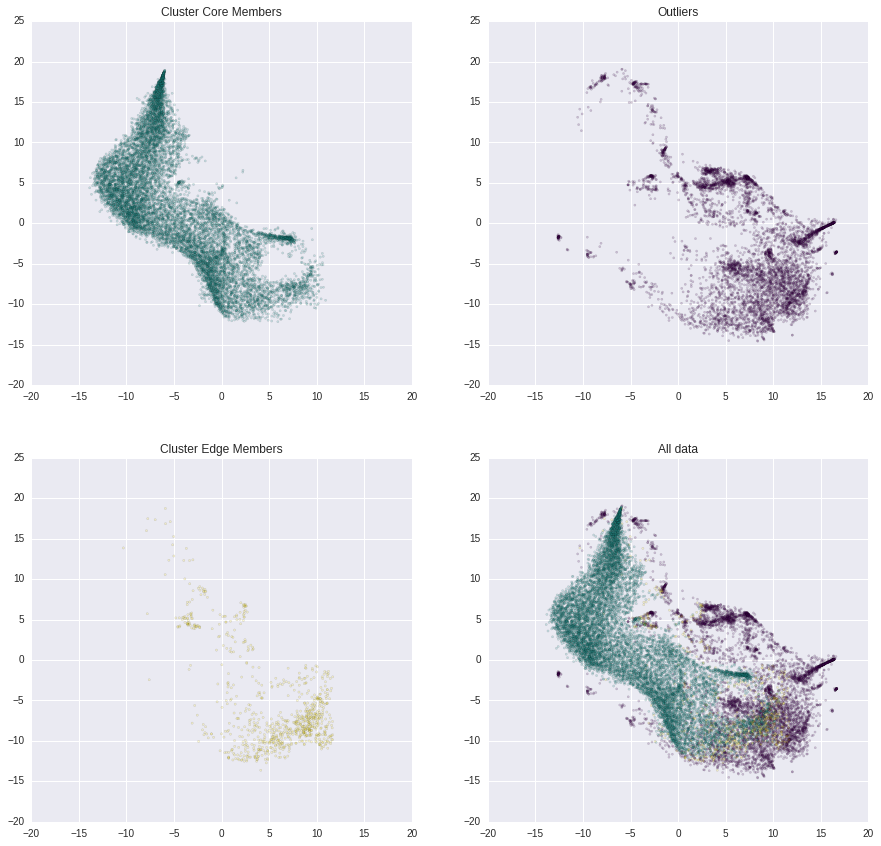

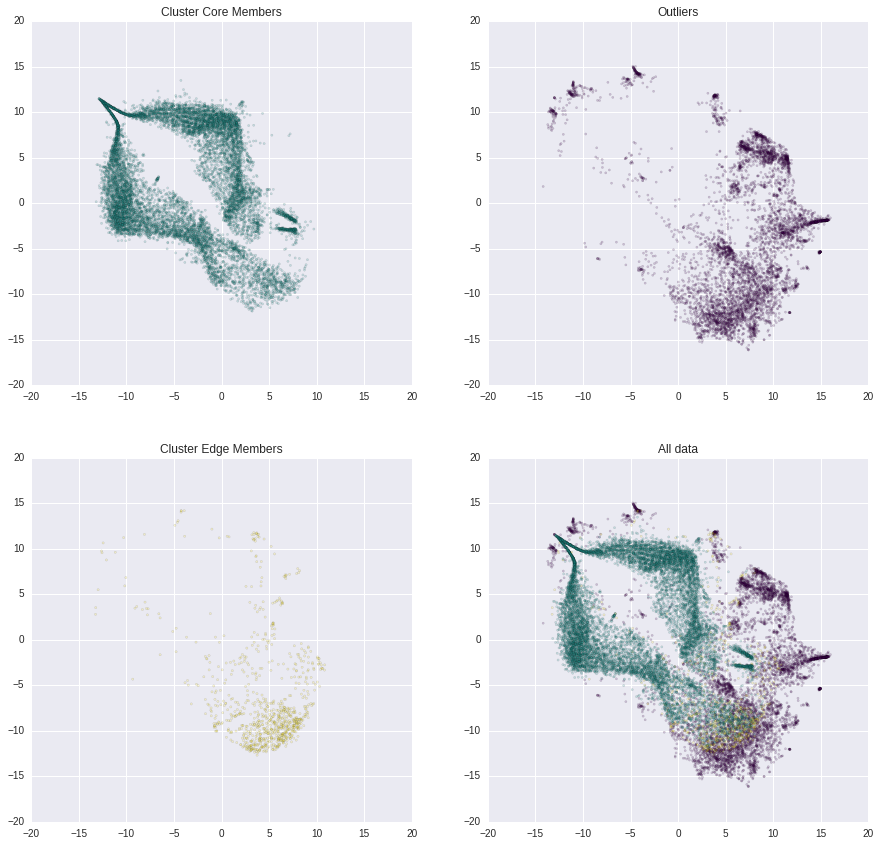

In [7]:
four_panel_tsne(Q4_sample.data)
four_panel_tsne(Q8_sample.data)
four_panel_tsne(Q11_sample.data)
four_panel_tsne(Q16_sample.data)

<IPython.core.display.Javascript object>


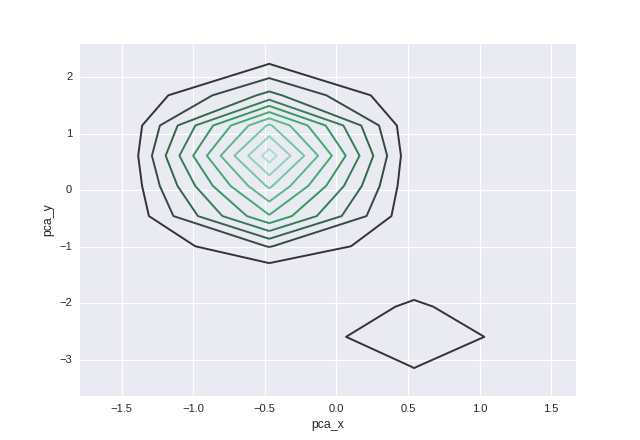

/home/dgiles/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/dgiles/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


In [3]:
%matplotlib notebook
sns.kdeplot(Q4.data[Q4.data.pca_x<100].pca_x,Q4.data[Q4.data.pca_x<100].pca_y,shade=False)

<IPython.core.display.Javascript object>


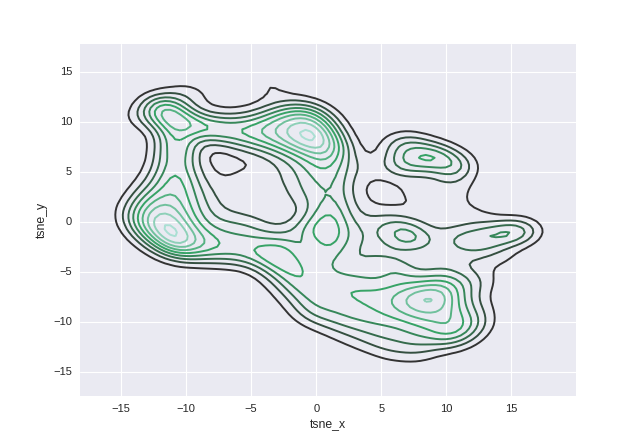

In [7]:

sns.kdeplot(Q4_sample.data[Q4_sample.data.tsne_x<40].tsne_x,
            Q4_sample.data[Q4_sample.data.tsne_x<40].tsne_y,
            shade=False)


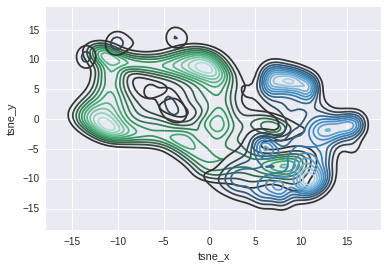

In [45]:
%matplotlib inline
inliers = Q4_sample.data[Q4_sample.data.db_out>=0]
outliers = Q4_sample.data[Q4_sample.data.db_out==-1]
sns.kdeplot(inliers[inliers.tsne_x<40].tsne_x,
            inliers[inliers.tsne_x<40].tsne_y,
            shade=False)
sns.kdeplot(outliers[outliers.tsne_x<40].tsne_x,
            outliers[outliers.tsne_x<40].tsne_y,
            shade=False,cmap='Blues_d')


In [43]:

def four_panel_kde(data):
    sns.set_style('dark')
    labels = data.db_out
    outliers = data[labels==-1]
    inliers = data[labels!=-1]
    
    cNorm  = colors.Normalize(vmin=min(labels), vmax=max(labels))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='viridis')
    colorVal = scalarMap.to_rgba(labels)

    fig = plt.figure(figsize=(15,30))
    ax1 = fig.add_subplot(421)

    ax1.scatter(data[data.tsne_x<40].tsne_x,
                data[data.tsne_x<40].tsne_y,
                c=colorVal[data.tsne_x<40],
                marker='.',alpha=.2)
    ax1.set_title('All Data')

    ax2 = fig.add_subplot(422)
    sns.kdeplot(inliers[inliers.tsne_x<40].tsne_x,
                inliers[inliers.tsne_x<40].tsne_y,
                shade=True,ax=ax2,cmap='Greens',shade_lowest=False)
    ax2.set_title('Cluster Members')

    ax3 = fig.add_subplot(423)
    sns.kdeplot(outliers[outliers.tsne_x<40].tsne_x,
                outliers[outliers.tsne_x<40].tsne_y,
                shade=True,ax=ax3,cmap='Blues',shade_lowest=False)
    ax3.set_title('Outliers')
    
    ax4 = fig.add_subplot(424)

    sns.kdeplot(inliers[inliers.tsne_x<40].tsne_x,
                inliers[inliers.tsne_x<40].tsne_y,
                shade=True,ax=ax4,cmap='Greens',shade_lowest=False, label='Cluster Members')
    """
    sns.kdeplot(outliers[outliers.tsne_x<40].tsne_x,
                outliers[outliers.tsne_x<40].tsne_y,
                shade=True,ax=ax4,cmap='Blues',shade_lowest=False,alpha=.6)
    #"""
    
    ax4.scatter(outliers[outliers.tsne_x<40].tsne_x,
           outliers[outliers.tsne_x<40].tsne_y,
           c=colorVal[labels==-1][outliers.tsne_x<40],
           marker='.',alpha=.2,label='Outliers')
    ax4.legend()
    #"""


    ax4.set_title('All data')
    
    ax1.set_xlim(ax4.get_xlim())
    ax1.set_ylim(ax4.get_ylim())
    ax2.set_xlim(ax4.get_xlim())
    ax2.set_ylim(ax4.get_ylim())
    ax3.set_xlim(ax4.get_xlim())
    ax3.set_ylim(ax4.get_ylim())

    return

In [86]:

def four_panel(data,
               col_clus='Greens_d',shade_clus=False,
               col_out='Purples_d',shade_out=False,
               col_edge='Oranges_d',shade_edge=False,
               types='all_kde'):
    
    if types=='all_kde':
        types='kkkk'
    elif types =='all_scatter':
        types='ssss'
    comb_plot=types[3:]
    
    if shade_clus and col_clus=='Greens_d':
        col_clus='Greens'
    if shade_out and col_out=='Purples_d':
        col_out='Purples'
    if shade_edge and col_edge=='Oranges_d':
        col_edge='Oranges'
        
    def panel(data,ax,c=None,cmap=None,shade=False,t='k',k_alpha=1):
        if t=='k':
            sns.kdeplot(data.tsne_x,data.tsne_y,
                        shade=shade,ax=ax,cmap=cmap,shade_lowest=False,alpha=k_alpha)
        if t=='s':
            ax.scatter(data.tsne_x,data.tsne_y,
                       c=c,marker='.',alpha=.2)
        
    sns.set_style('white')
    labels = data.db_out
    
    outliers = data[labels==-1]
    core = data[labels==0]
    edge = data[labels==1]
    
    # for scatter plots, creates common color map to be used in different plots w/ different data
    cNorm  = colors.Normalize(vmin=min(labels), vmax=max(labels))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='viridis')
    colorVal = scalarMap.to_rgba(labels)

    fig = plt.figure(figsize=(15,30))
    ax1 = fig.add_subplot(421)
    ax2 = fig.add_subplot(422)
    ax3 = fig.add_subplot(423)
    ax4 = fig.add_subplot(424)
    panels = [ax1,ax2,ax3,ax4]
    # Panel 1
    panel(core[core.tsne_x<40],cmap=col_clus,shade=shade_clus,
          c=colorVal[data.db_out==0][core.tsne_x<40],t=types[0],ax=ax1)
    ax1.set_title('Cluster Core Members')
    # Panel 2
    panel(outliers[outliers.tsne_x<40],cmap=col_out,shade=shade_out,
          c=colorVal[data.db_out==-1][outliers.tsne_x<40],t=types[1],ax=ax2)
    ax2.set_title('Outliers')
    # Panel 3
    panel(edge[edge.tsne_x<40],cmap=col_edge,shade=shade_edge,
          c=colorVal[data.db_out==1][edge.tsne_x<40],t=types[2],ax=ax3)
    ax3.set_title('Cluster Edge Members')
    # Panel 4
    if comb_plot=='k':
        # All kde
        panel(core[core.tsne_x<40],cmap=col_clus,shade=shade_clus,t='k',ax=ax4)
        panel(outliers[outliers.tsne_x<40],cmap=col_out,shade=shade_out,t='k',ax=ax4)
        panel(edge[edge.tsne_x<40],cmap=col_edge,shade=shade_edge,t='k',ax=ax4)
    elif comb_plot=='s':
        # All scatter
        panel(core[core.tsne_x<40],c=colorVal[data.db_out==0][core.tsne_x<40],t='s',ax=ax4)
        panel(outliers[outliers.tsne_x<40],c=colorVal[data.db_out==-1][outliers.tsne_x<40],t='s',ax=ax4)
        panel(edge[edge.tsne_x<40],c=colorVal[data.db_out==1][edge.tsne_x<40],t='s',ax=ax4)
        
    elif comb_plot=='ks':
        # Cluster kde, outliers scatter
        panel(core[core.tsne_x<40],cmap=col_clus,shade=shade_clus,t='k',ax=ax4)
        panel(outliers[outliers.tsne_x<40],c=colorVal[data.db_out==-1][outliers.tsne_x<40],t='s',ax=ax4)
        panel(edge[edge.tsne_x<40],cmap=col_edge,shade=shade_edge,t='k',ax=ax4)
    
    elif comb_plot=='kands':
        panel(core[core.tsne_x<40],c=colorVal[data.db_out==0][core.tsne_x<40],t='s',ax=ax4)
        panel(outliers[outliers.tsne_x<40],c=colorVal[data.db_out==-1][outliers.tsne_x<40],t='s',ax=ax4)
        panel(edge[edge.tsne_x<40],c=colorVal[data.db_out==1][edge.tsne_x<40],t='s',ax=ax4)
        
        panel(core[core.tsne_x<40],cmap=col_clus,shade=shade_clus,t='k',ax=ax4,k_alpha=.5)
        panel(outliers[outliers.tsne_x<40],cmap=col_out,shade=shade_out,t='k',ax=ax4,k_alpha=.5)
        panel(edge[edge.tsne_x<40],cmap=col_edge,shade=shade_edge,t='k',ax=ax4,k_alpha=.5)
    #"""


    ax4.set_title('All data')
    
    ax1.set_xlim(ax4.get_xlim())
    ax1.set_ylim(ax4.get_ylim())
    ax2.set_xlim(ax4.get_xlim())
    ax2.set_ylim(ax4.get_ylim())
    ax3.set_xlim(ax4.get_xlim())
    ax3.set_ylim(ax4.get_ylim())

    return

# 4-panel plots

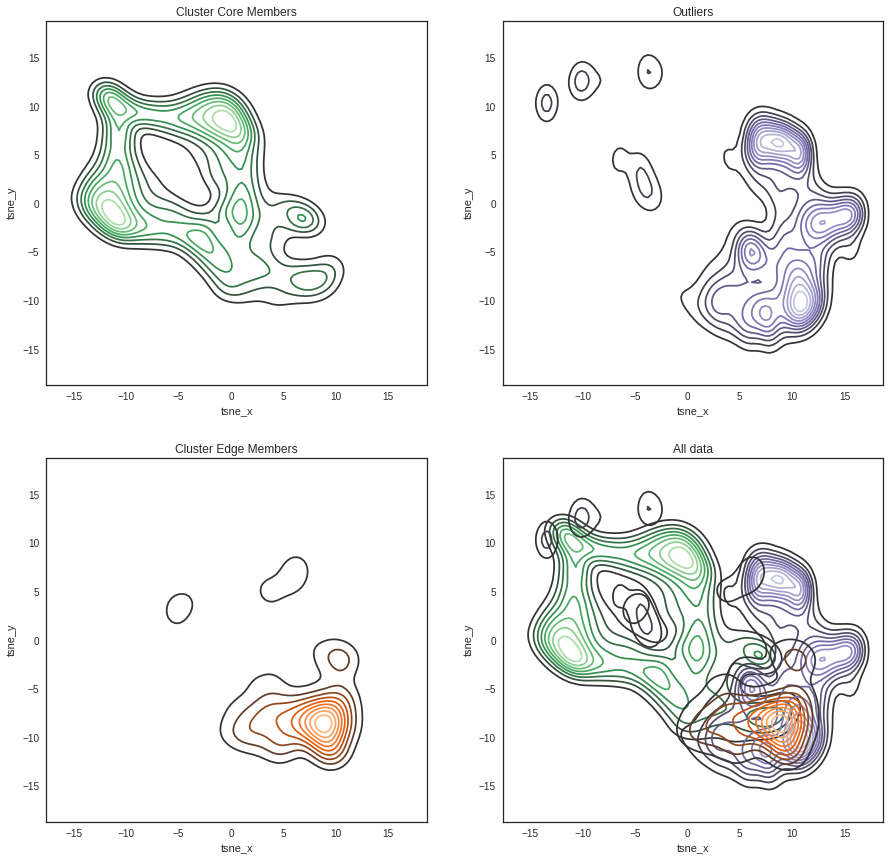

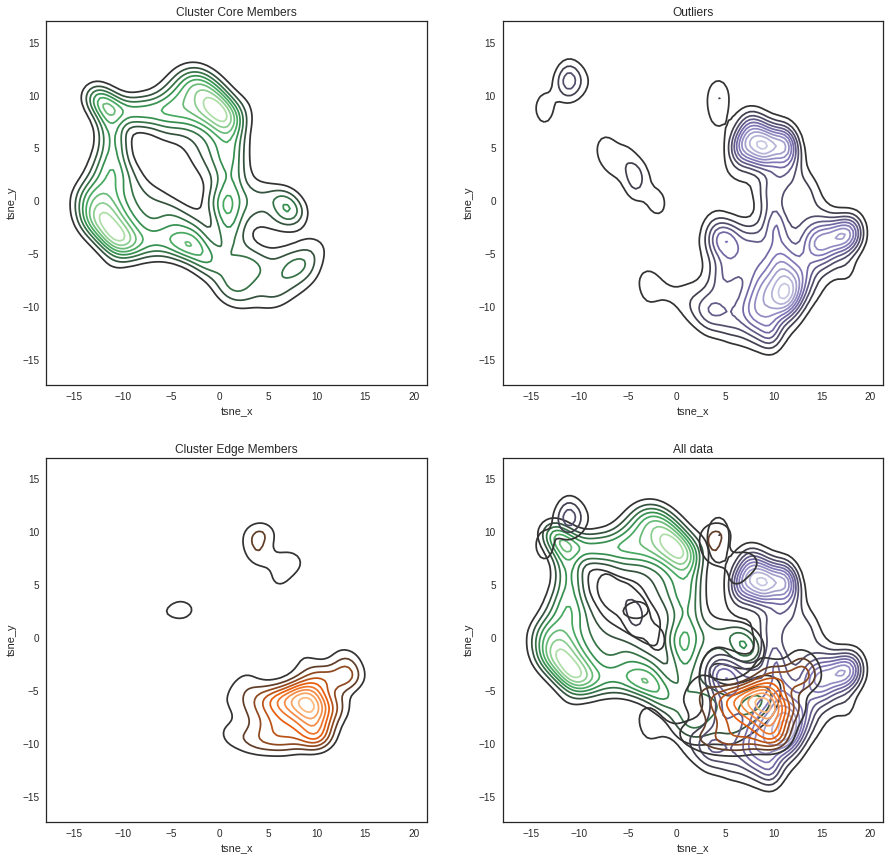

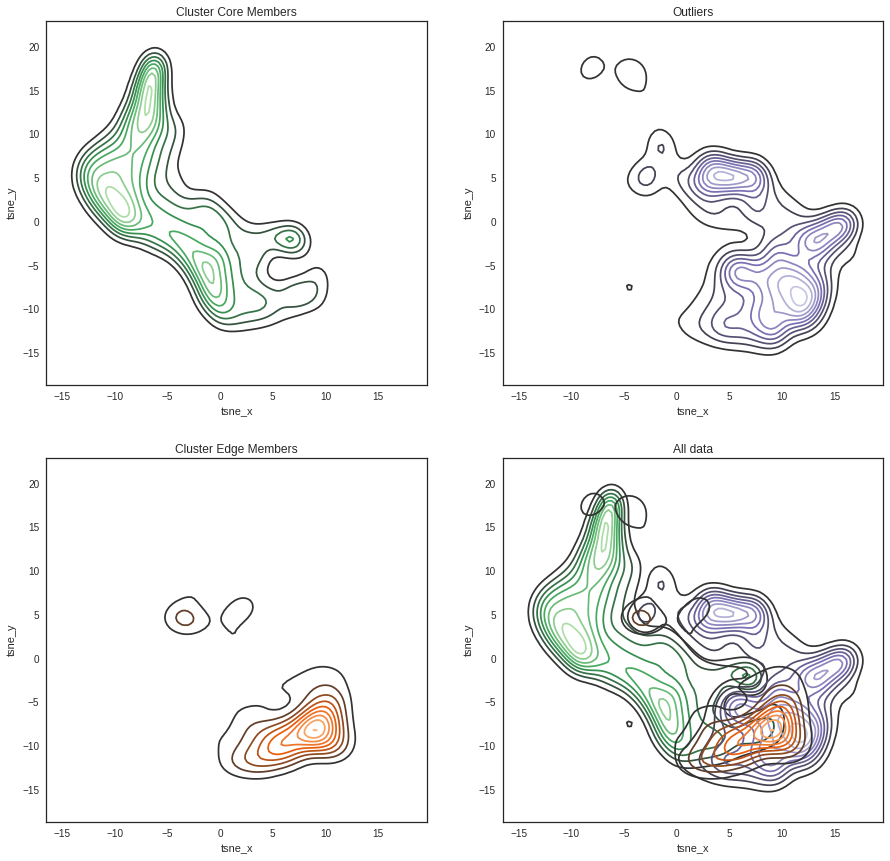

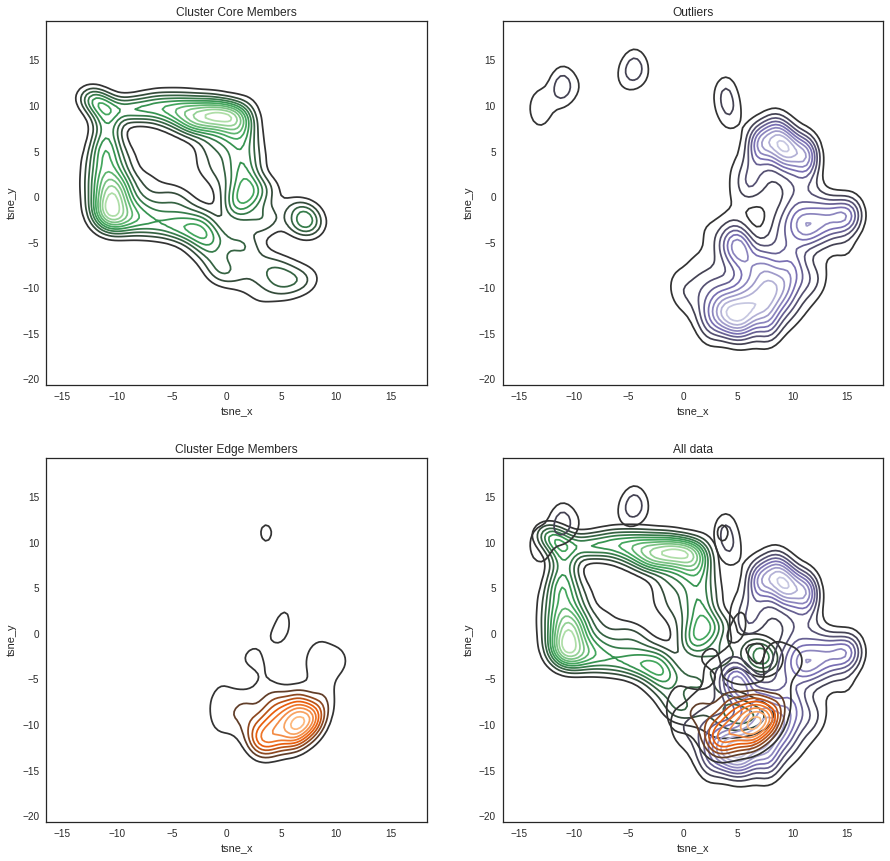

In [89]:
four_panel(Q4_sample.data,types='kkkk')
four_panel(Q8_sample.data,types='kkkk')
four_panel(Q11_sample.data,types='kkkk')
four_panel(Q16_sample.data,types='kkkk')

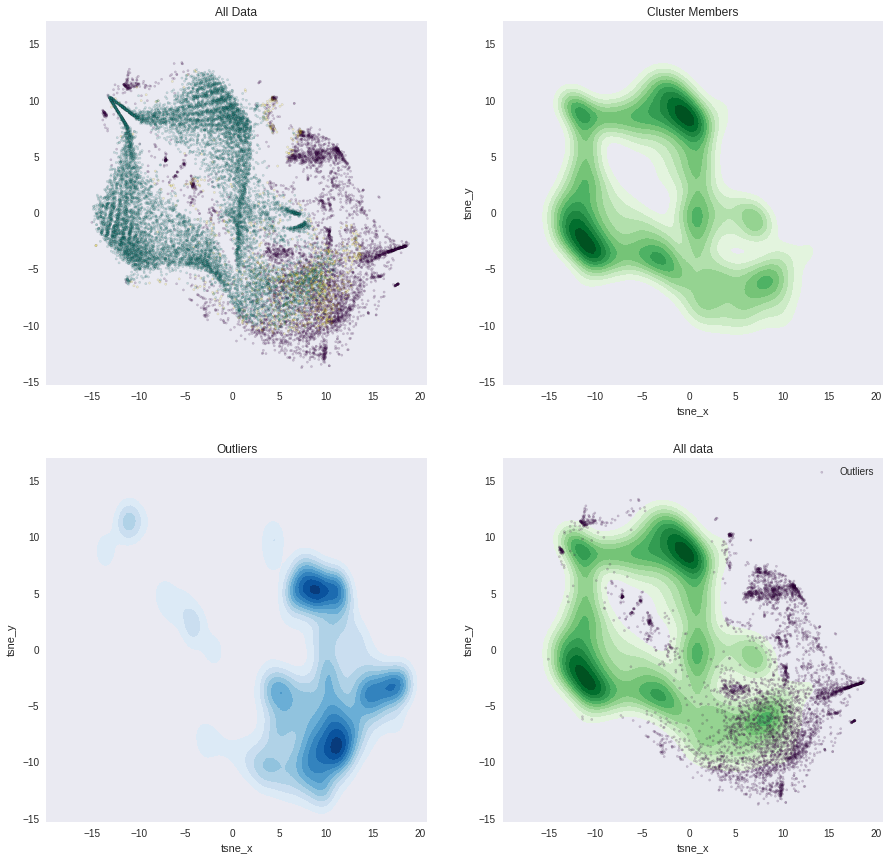

In [45]:
four_panel_kde(Q8_sample.data)

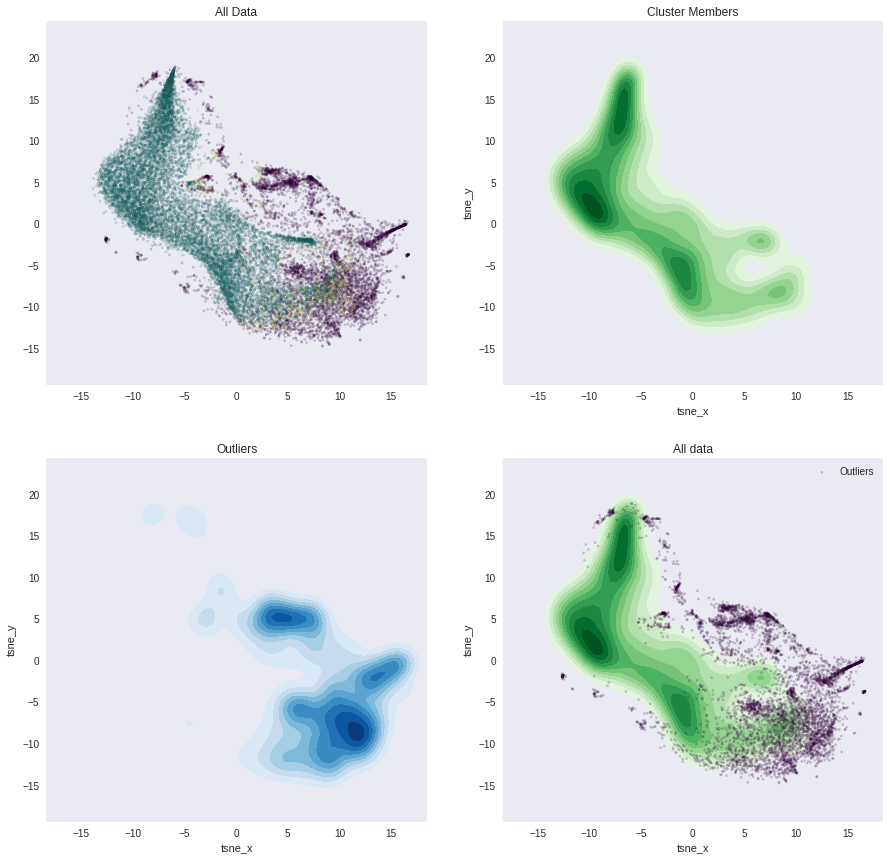

In [46]:
four_panel_kde(Q11_sample.data)

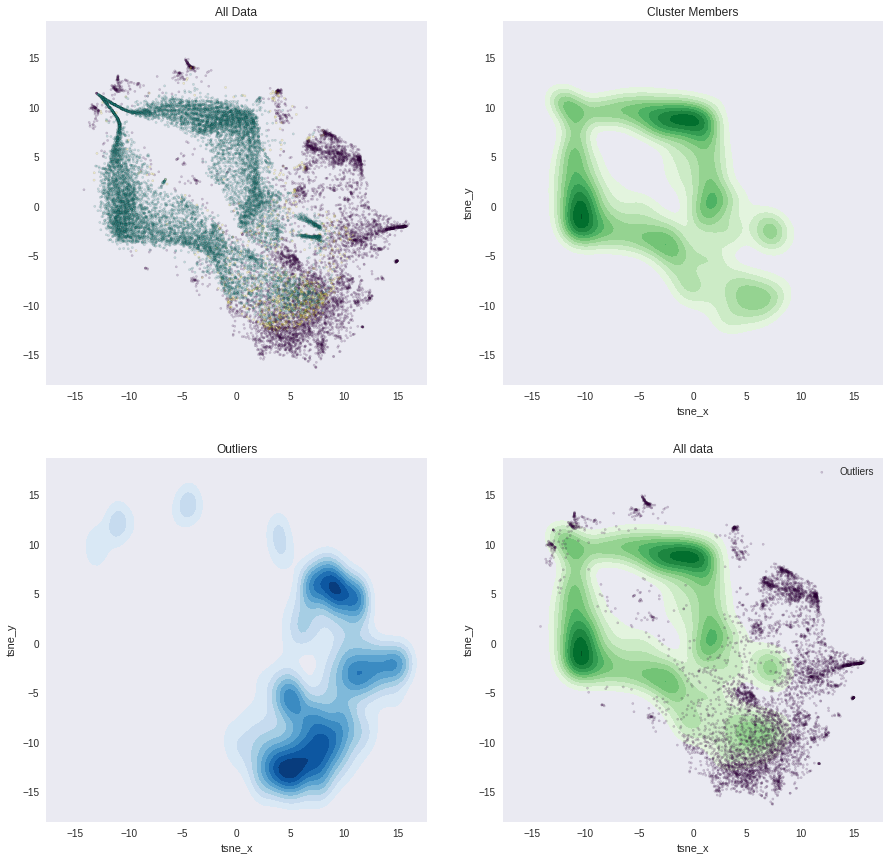

In [47]:
four_panel_kde(Q16_sample.data)

# Stats of interest

In [53]:
Q_dict = {'Q4':Q4_sample,'Q8':Q8_sample,'Q11':Q11_sample,'Q16':Q16_sample}

In [54]:
for q in Q_dict:
    print(q,len(Q_dict[q].data[Q_dict[q].data.db_out==-1]))

('Q8', 5041)
('Q16', 5750)
('Q11', 5879)
('Q4', 4866)


In [56]:

for q in Q_dict:
    data = Q_dict[q].data
    Q_dict[q].data['KID']=[i[:13] for i in Q_dict[q].data.index]
    
# A numpy arrays containing all kID's for data ID'd as outliers
kid_out=dict()
for q in Q_dict:
    kid_out[q]=Q_dict[q].data.KID[Q_dict[q].data.db_out==-1]

# Outliers in any quarter, not necessarily in all quarters
out_all = np.unique(np.concatenate([kid_out[q] for q in kid_out]))

print("""
Number of lightcurves identified as an outlier in at least one quarter {:}
""".format(len(out_all)))
print("""
As a percent of total lightcurves ({:}/{:}) {:.2f}%
""".format(len(out_all),
           len(Q4.data),
           float(len(out_all))/float(len(Q4.data))*100.))


Number of lightcurves identified as an outlier in at least one quarter 8507


As a percent of total lightcurves (8507/149789) 5.68%



In [57]:
# Identify outliers that are exclusive to each quarter
exc = dict()
for q in kid_out:
    out = kid_out[q]
    for p in kid_out:
        if q!=p:
            out = np.setdiff1d(out,kid_out[p])
    exc[q]=out
    print("""
    Number of lightcurves identified outliers only in {:s}: {:d}
    As a percent of quarter outliers ({:d}/{:d}): {:.2f}%
    As a percent of total outliers ({:d}/{:d}): {:.2f}%
    """.format(q,len(exc[q]),
              len(exc[q]),len(kid_out[q]),float(len(exc[q]))/float(len(kid_out[q]))*100.,
              len(exc[q]),len(Q4.data),float(len(exc[q]))/float(len(Q4.data))*100.
              ))


    Number of lightcurves identified outliers only in Q8: 624
    As a percent of quarter outliers (624/5041): 12.38%
    As a percent of total outliers (624/149789): 0.42%
    

    Number of lightcurves identified outliers only in Q16: 1043
    As a percent of quarter outliers (1043/5750): 18.14%
    As a percent of total outliers (1043/149789): 0.70%
    

    Number of lightcurves identified outliers only in Q11: 1147
    As a percent of quarter outliers (1147/5879): 19.51%
    As a percent of total outliers (1147/149789): 0.77%
    

    Number of lightcurves identified outliers only in Q4: 560
    As a percent of quarter outliers (560/4866): 11.51%
    As a percent of total outliers (560/149789): 0.37%
    


In [100]:
# Identify outliers that are ubiquitous to each quarter
out = kid_out['Q4'] # start w/ Q4
for q in kid_out: # loop through remaining Q's to check overlap
    if q!='Q4': 
        out = np.intersect1d(out,kid_out[q])

ub_out = out
print("""
Number of lightcurves identified as outliers in all quarters: {:d}
As a percent of all outliers ({:d}/{:d}): {:.2f}%
As a percent of all lightcurves ({:d}/{:d}): {:.2f}%
""".format(len(out),
          len(out),len(kid_out[q]),float(len(out))/float(len(out_all))*100.,
          len(out),len(Q4.data),float(len(out))/float(len(Q4.data))*100.
          ))


Number of lightcurves identified as outliers in all quarters: 3584
As a percent of all outliers (3584/4866): 42.13%
As a percent of all lightcurves (3584/149789): 2.39%



In [113]:
np.random.seed(50)
all_exc = np.concatenate([exc[q] for q in exc])
all_mixed = np.setdiff1d(np.setdiff1d(out_all,all_exc),ub_out)
out_samp_inds=np.concatenate([np.random.choice(all_exc,2),np.random.choice(ub_out,2),np.random.choice(all_mixed,2)])
out_samp_inds = np.append(out_samp_inds,'kplr8462852')
out_samp_inds

array(['kplr003114661', 'kplr010334631', 'kplr007818448', 'kplr008233804',
       'kplr010065429', 'kplr003547996', 'kplr8462852'], dtype=object)